In [ ]:
#Crédito - Modelo PD 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import feature_engine

In [2]:
credit = pd.read_csv("C:/Users/GCA/OneDrive/Documentos/PC75/Aulas 2023/ASN Crédito/Codigos/german_credit_data.csv", encoding ='UTF-8')
credit = credit.drop(columns = ['Unnamed: 0'])

In [3]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# Risk é a variavel resposta (y)

In [4]:
for column in credit.drop(columns = ['Credit amount','Duration','Age','Risk']):
    credit[column +'_cat'] = credit[column].astype('object')

In [5]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Sex_cat,Job_cat,Housing_cat,Saving accounts_cat,Checking account_cat,Purpose_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,male,2,own,NaN,little,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,female,2,own,little,moderate,radio/TV
2,49,male,1,own,little,NaN,2096,12,education,good,male,1,own,little,NaN,education
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,male,2,free,little,little,furniture/equipment
4,53,male,2,free,little,little,4870,24,car,bad,male,2,free,little,little,car


In [6]:
#Transforam variavel resposta em binaria 
condicoes = [
    (credit['Risk'] == 'good' ),
    (credit['Risk'] == 'bad')
    ]

valores = [0,1]
credit['bad'] = np.select(condicoes, valores)
credit.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Sex_cat,Job_cat,Housing_cat,Saving accounts_cat,Checking account_cat,Purpose_cat,bad
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,female,1,own,little,NaN,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,good,male,3,own,little,little,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,good,male,2,own,little,NaN,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,bad,male,2,free,little,little,radio/TV,1
999,27,male,2,own,moderate,moderate,4576,45,car,good,male,2,own,moderate,moderate,car,0


In [7]:
credit_adj = credit.drop(columns = ['Sex','Housing' ,'Saving accounts', 'Checking account', 'Purpose' ,'Risk']
                         , inplace = False)
credit_adj.tail()

,Age,Job,Credit amount,Duration,Sex_cat,Job_cat,Housing_cat,Saving accounts_cat,Checking account_cat,Purpose_cat,bad
995,31,1,1736,12,female,1,own,little,NaN,furniture/equipment,0
996,40,3,3857,30,male,3,own,little,little,car,0
997,38,2,804,12,male,2,own,little,NaN,radio/TV,0
998,23,2,1845,45,male,2,free,little,little,radio/TV,1
999,27,2,4576,45,male,2,own,moderate,moderate,car,0


In [ ]:
#Gráficos & Analises


count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64


C:\Users\GCA\AppData\Local\Temp\ipykernel_11744\2559535044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=credit['Credit amount'], color='g', bins=100, hist_kws={'alpha': 0.4});


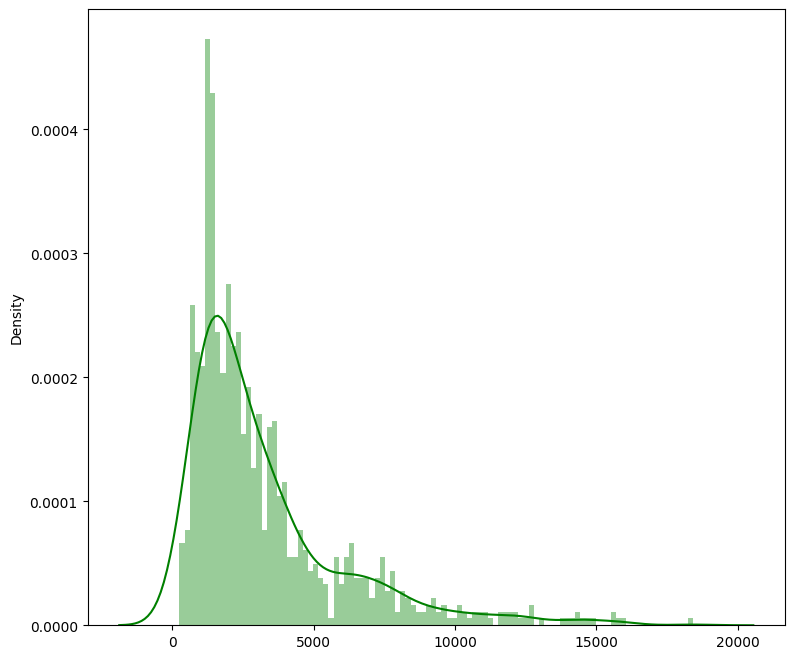

In [8]:
print(credit['Age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(x=credit['Credit amount'], color='g', bins=100, hist_kws={'alpha': 0.4});

C:\Users\GCA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


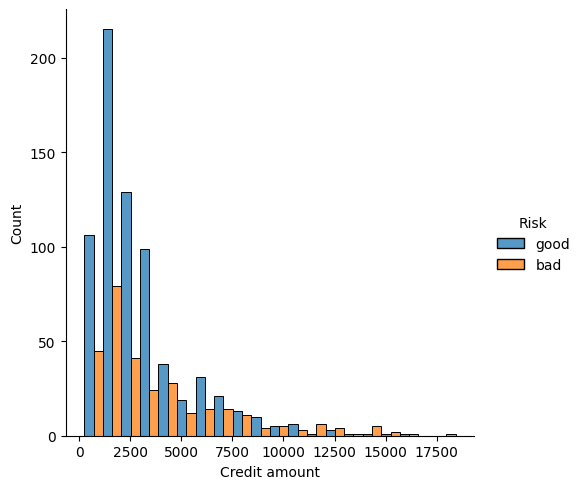

In [9]:
sns.displot(credit, x="Credit amount", hue="Risk",multiple="dodge",color='g', bins=20)

C:\Users\GCA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


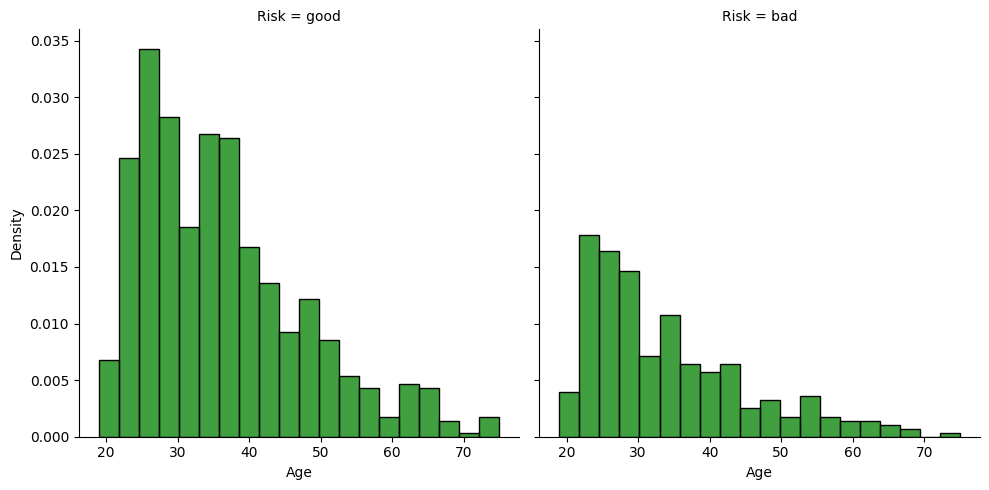

In [10]:
sns.displot(credit, x="Age", col="Risk",multiple="dodge",color='g',stat="density", bins=20)

C:\Users\GCA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\GCA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


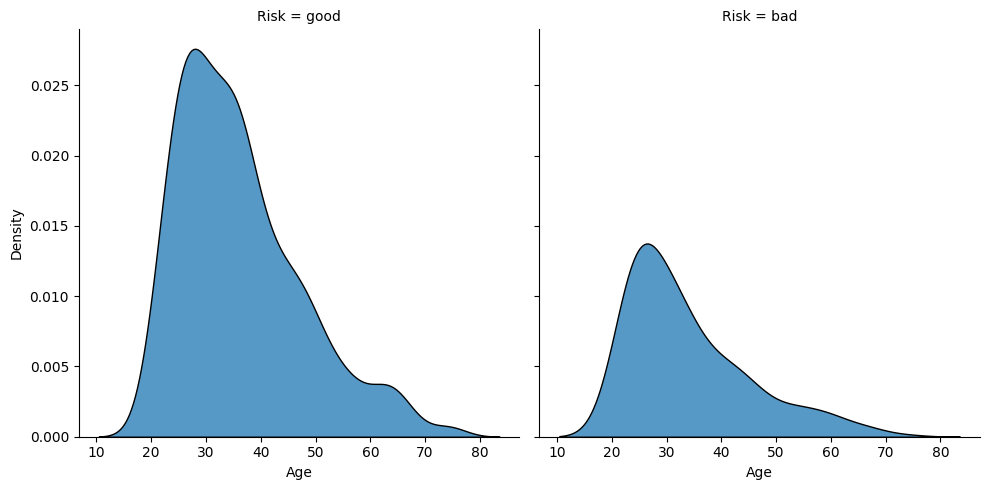

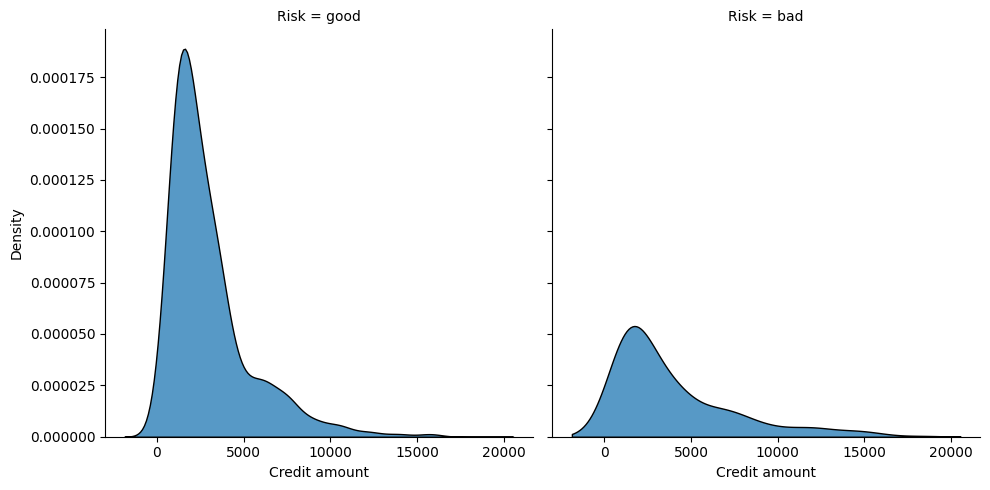

In [11]:
for column in credit[["Age", "Credit amount"]]:
    sns.displot(credit, x=column, col="Risk",kind="kde", multiple="stack")

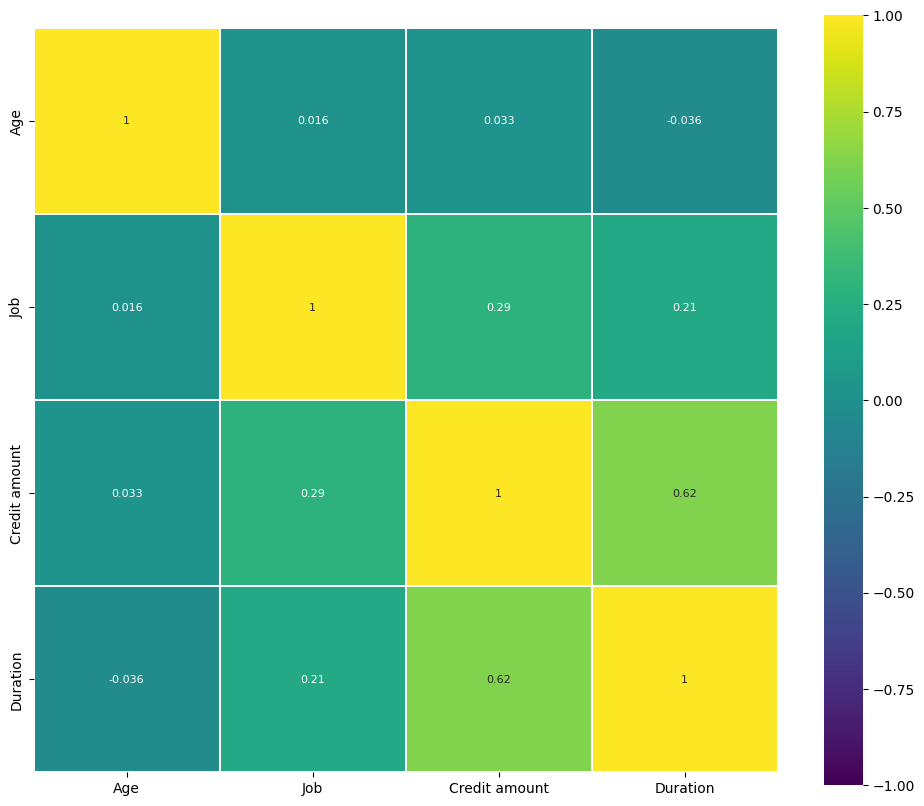

In [12]:
credit_num = credit.select_dtypes(include = ['float64', 'int64'])
corr = credit_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr,
    #corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

(array([0, 1]), [Text(0, 0, 'good'), Text(1, 0, 'bad')])

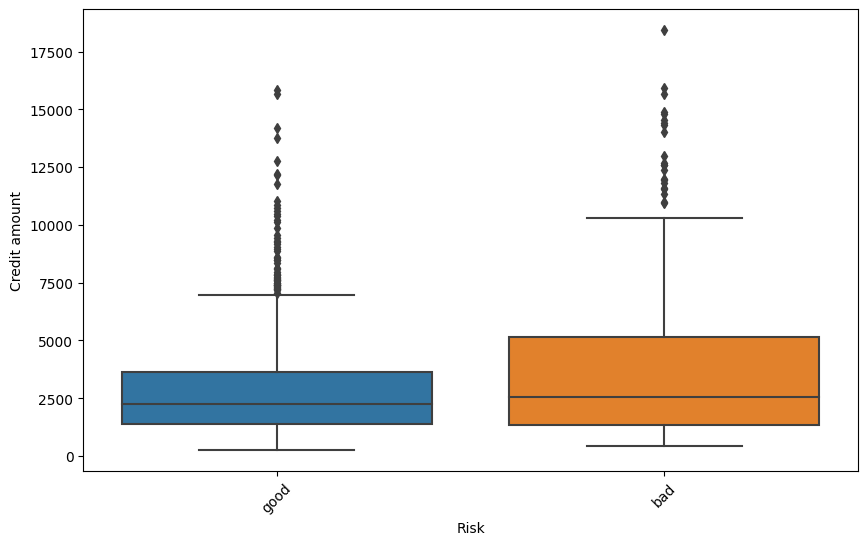

In [13]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x="Risk", y='Credit amount', data=credit)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
credit_adj.dtypes

In [14]:
#Remover Job . 
credit_adj.drop(columns = ['Job']
                         , inplace = True)

credit_adj.tail()

,Age,Credit amount,Duration,Sex_cat,Job_cat,Housing_cat,Saving accounts_cat,Checking account_cat,Purpose_cat,bad
995,31,1736,12,female,1,own,little,NaN,furniture/equipment,0
996,40,3857,30,male,3,own,little,little,car,0
997,38,804,12,male,2,own,little,NaN,radio/TV,0
998,23,1845,45,male,2,free,little,little,radio/TV,1
999,27,4576,45,male,2,own,moderate,moderate,car,0


In [15]:
from sklearn.model_selection import train_test_split
x = credit_adj.drop('bad', axis = 1)
y = credit_adj['bad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state = 0, stratify = y)
# --------------- contando -----------------
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
y_test.head()

bad
0    0.7
1    0.3
Name: proportion, dtype: float64
bad
0    0.7
1    0.3
Name: proportion, dtype: float64


529    0
355    1
461    0
286    0
938    1
Name: bad, dtype: int32

In [16]:
 print("NaN por colunar" , x_train.isnull().sum(), sep='\n')

NaN por colunar
Age                       0
Credit amount             0
Duration                  0
Sex_cat                   0
Job_cat                   0
Housing_cat               0
Saving accounts_cat     144
Checking account_cat    323
Purpose_cat               0
dtype: int64


In [17]:
#Inputando missing:
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(variables=['Sex_cat', 'Housing_cat', 'Saving accounts_cat',
                                                    "Checking account_cat",'Purpose_cat'])
imputer.fit(x_train)
x_train_i= imputer.transform(x_train)
x_test_i= imputer.transform(x_test)
x_train_i.tail()

,Age,Credit amount,Duration,Sex_cat,Job_cat,Housing_cat,Saving accounts_cat,Checking account_cat,Purpose_cat
388,27,2326,15,male,2,own,quite rich,moderate,business
878,27,1422,9,male,3,free,little,little,car
135,38,1240,12,female,2,own,Missing,Missing,radio/TV
93,20,3617,24,male,2,rent,Missing,rich,furniture/equipment
162,36,1262,15,male,2,own,quite rich,Missing,domestic appliances


In [18]:
print("NaN por colunar" , x_train_i.isnull().sum(), sep='\n')

NaN por colunar
Age                     0
Credit amount           0
Duration                0
Sex_cat                 0
Job_cat                 0
Housing_cat             0
Saving accounts_cat     0
Checking account_cat    0
Purpose_cat             0
dtype: int64


In [19]:
#CRIAR Variaveis Dummies
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(
    #top_categories=2,
    variables=['Sex_cat','Job_cat', 'Housing_cat', 'Saving accounts_cat',
                      "Checking account_cat",'Purpose_cat'],  drop_last=True)
#Mostra diferença do True e False e explicar 
encoder.fit(x_train_i)
x_train_t= encoder.transform(x_train_i)
x_test_t= encoder.transform(x_test_i)
x_train_t.tail()

,Age,Credit amount,Duration,Sex_cat_male,Job_cat_2,Job_cat_1,Job_cat_3,Housing_cat_own,Housing_cat_free,Saving accounts_cat_Missing,...,Checking account_cat_moderate,Checking account_cat_Missing,Checking account_cat_little,Purpose_cat_car,Purpose_cat_repairs,Purpose_cat_business,Purpose_cat_radio/TV,Purpose_cat_furniture/equipment,Purpose_cat_education,Purpose_cat_vacation/others
388,27,2326,15,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
878,27,1422,9,1,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
135,38,1240,12,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
93,20,3617,24,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
162,36,1262,15,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


[0.15793054 0.17552952 0.14425992 0.04256068 0.03058489 0.02355134
 0.02360194 0.03284908 0.016601   0.02257582 0.01635461 0.02735099
 0.01174784 0.03187142 0.06237057 0.04648131 0.0278363  0.01087194
 0.02138864 0.02684827 0.02571794 0.01724737 0.00386806]


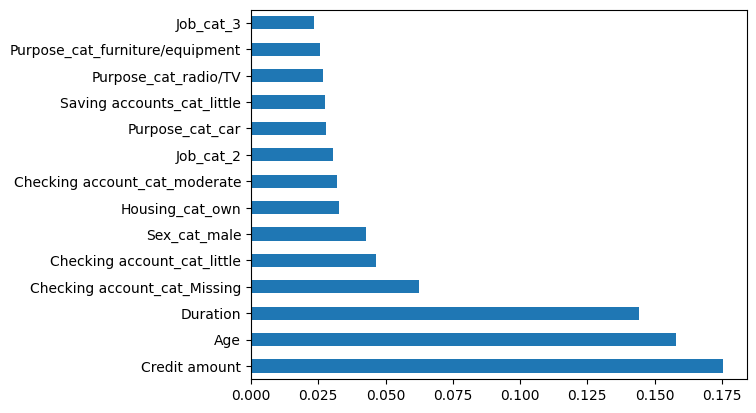

In [20]:
#Testar seleção de variaveis -  Arvore
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train_t,y_train)
print(model.feature_importances_) #Utiliza uma arvore para definir a importancia das variaveis!
#Visualização da importnacia
importance_tree = pd.Series(model.feature_importances_, index=x_train_t.columns)
importance_tree.nlargest(14).plot(kind='barh')
plt.show() 
#Poderiamos normalizar as variaveis continuas antes  
#Poderiamos fazer essa validação antes de criar o OnehotEncode

Age                               -0.002819
Credit amount                      0.000006
Duration                           0.006399
Sex_cat_male                      -0.061725
Job_cat_2                         -0.002150
Job_cat_1                         -0.017109
Job_cat_3                         -0.012836
Housing_cat_own                   -0.066150
Housing_cat_free                  -0.064246
Saving accounts_cat_Missing       -0.003733
Saving accounts_cat_moderate       0.115199
Saving accounts_cat_little         0.130271
Saving accounts_cat_quite rich     0.041931
Checking account_cat_moderate      0.104451
Checking account_cat_Missing      -0.117266
Checking account_cat_little        0.193795
Purpose_cat_car                   -0.077028
Purpose_cat_repairs               -0.028940
Purpose_cat_business              -0.049177
Purpose_cat_radio/TV              -0.153903
Purpose_cat_furniture/equipment   -0.135843
Purpose_cat_education              0.041810
Purpose_cat_vacation/others     

<Axes: >

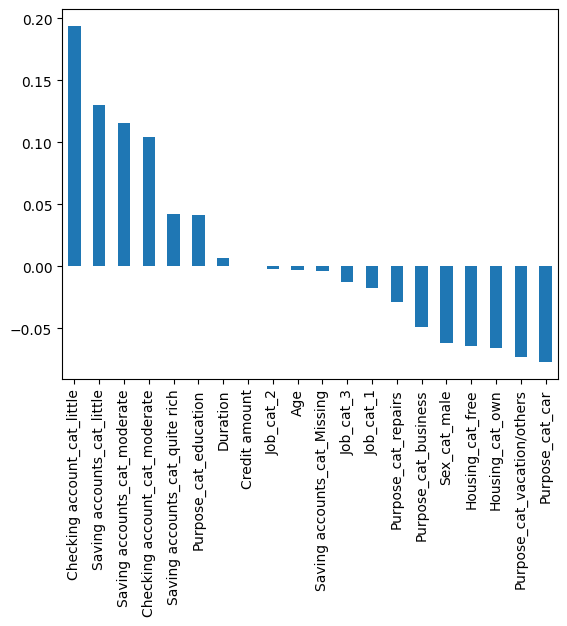

In [21]:
# #Testar seleção de variaveis - Regressão
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# Definir Modelo
model = LinearRegression()
model.fit(x_train_t,y_train)
# Importancia
importance = model.coef_
importance_reg = pd.Series(model.coef_, index=x_train_t.columns)
# Sumarrizar importancia
print(importance_reg)  
# Visualizar 
importance_reg.nlargest(20).plot(kind='bar')

In [ ]:
# #Testar seleção de variaveis - xgboost
import xgboost
print(xgboost.__version__)
from xgboost import XGBRegressor
from matplotlib import pyplot
# Definir Modelo
model = XGBRegressor()
#AJustar o Modelo
model.fit(x_train_t,y_train)
#Buscar Importancia 
importance = model.feature_importances_
importance_xgboos = pd.Series(model.feature_importances_, index=x_train_t.columns)
print(importance_xgboos) 
# Visualizar 
importance_xgboos.nlargest(20).plot(kind='bar')

In [22]:
#Seleção Univariate Por chi2 
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train_t,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train_t.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#Poderiamos normalizar as variaveis continuas antes  
#Poderiamos fazer essa validação antes de criar o OnehotEncode

                             Specs         Score
1                    Credit amount  42947.553898
2                         Duration    240.418478
14    Checking account_cat_Missing     49.423706
0                              Age     37.791014
15     Checking account_cat_little     36.006116
19            Purpose_cat_radio/TV     11.204392
13   Checking account_cat_moderate     10.681319
9      Saving accounts_cat_Missing      9.783069
11      Saving accounts_cat_little      7.084548
12  Saving accounts_cat_quite rich      4.666667


In [23]:
#Verificar se uma variavel tem concentração de bons ou mals
df = pd.concat([x_train_t['Checking account_cat_Missing'], y_train], axis = 1)
    #Contar quantas vezes 
df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    #deletar duplicação
df = df.iloc[:, [0, 1, 3]]
    #renomear
df.columns = [df.columns.values[0], 'n_obs', 'bad_rate']
df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
df['n_bad'] = df['bad_rate'] * df['n_obs']
df['n_good'] = (1 - df['bad_rate']) * df['n_obs']
df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
df = df.sort_values(['WoE'])
df['IV'] = (df['prop_n_good'] - df['prop_n_bad'] )* df['WoE']
df['IV'] = df['IV'].sum()
df

,Checking account_cat_Missing,n_obs,bad_rate,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,IV
0,0,477,0.421384,0.59625,201.0,276.0,0.492857,0.8375,-0.530202,0.574973
1,1,323,0.120743,0.40375,39.0,284.0,0.507143,0.1625,1.138115,0.574973


In [24]:
for column in x_train_t.drop(columns = ['Credit amount','Duration','Age']): 
   
    df = pd.concat([x_train_t[column], y_train], axis = 1)
    #Contar quantas vezes 
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    #deletar duplicação
    df = df.iloc[:, [0, 1, 3]]
    #renomear
    df.columns = [df.columns.values[0], 'n_obs', 'bad_rate']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['bad_rate'] * df['n_obs']
    df['n_good'] = (1 - df['bad_rate']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'] )* df['WoE']
    df['IV'] = df['IV'].sum()
    print(df)

   Sex_cat_male  n_obs  bad_rate  prop_n_obs  n_bad  n_good  prop_n_good  \
0             0    244  0.356557       0.305   87.0   157.0     0.280357   
1             1    556  0.275180       0.695  153.0   403.0     0.719643   

   prop_n_bad       WoE        IV  
0      0.3625 -0.256960  0.031063  
1      0.6375  0.121201  0.031063  
   Job_cat_2  n_obs  bad_rate  prop_n_obs  n_bad  n_good  prop_n_good  \
0          0    296  0.300676        0.37   89.0   207.0     0.369643   
1          1    504  0.299603        0.63  151.0   353.0     0.630357   

   prop_n_bad       WoE        IV  
0    0.370833 -0.003215  0.000006  
1    0.629167  0.001890  0.000006  
   Job_cat_1  n_obs  bad_rate  prop_n_obs  n_bad  n_good  prop_n_good  \
0          0    642  0.306854      0.8025  197.0   445.0     0.794643   
1          1    158  0.272152      0.1975   43.0   115.0     0.205357   

   prop_n_bad       WoE        IV  
0    0.820833 -0.032427  0.004423  
1    0.179167  0.136434  0.004423  
   Job_

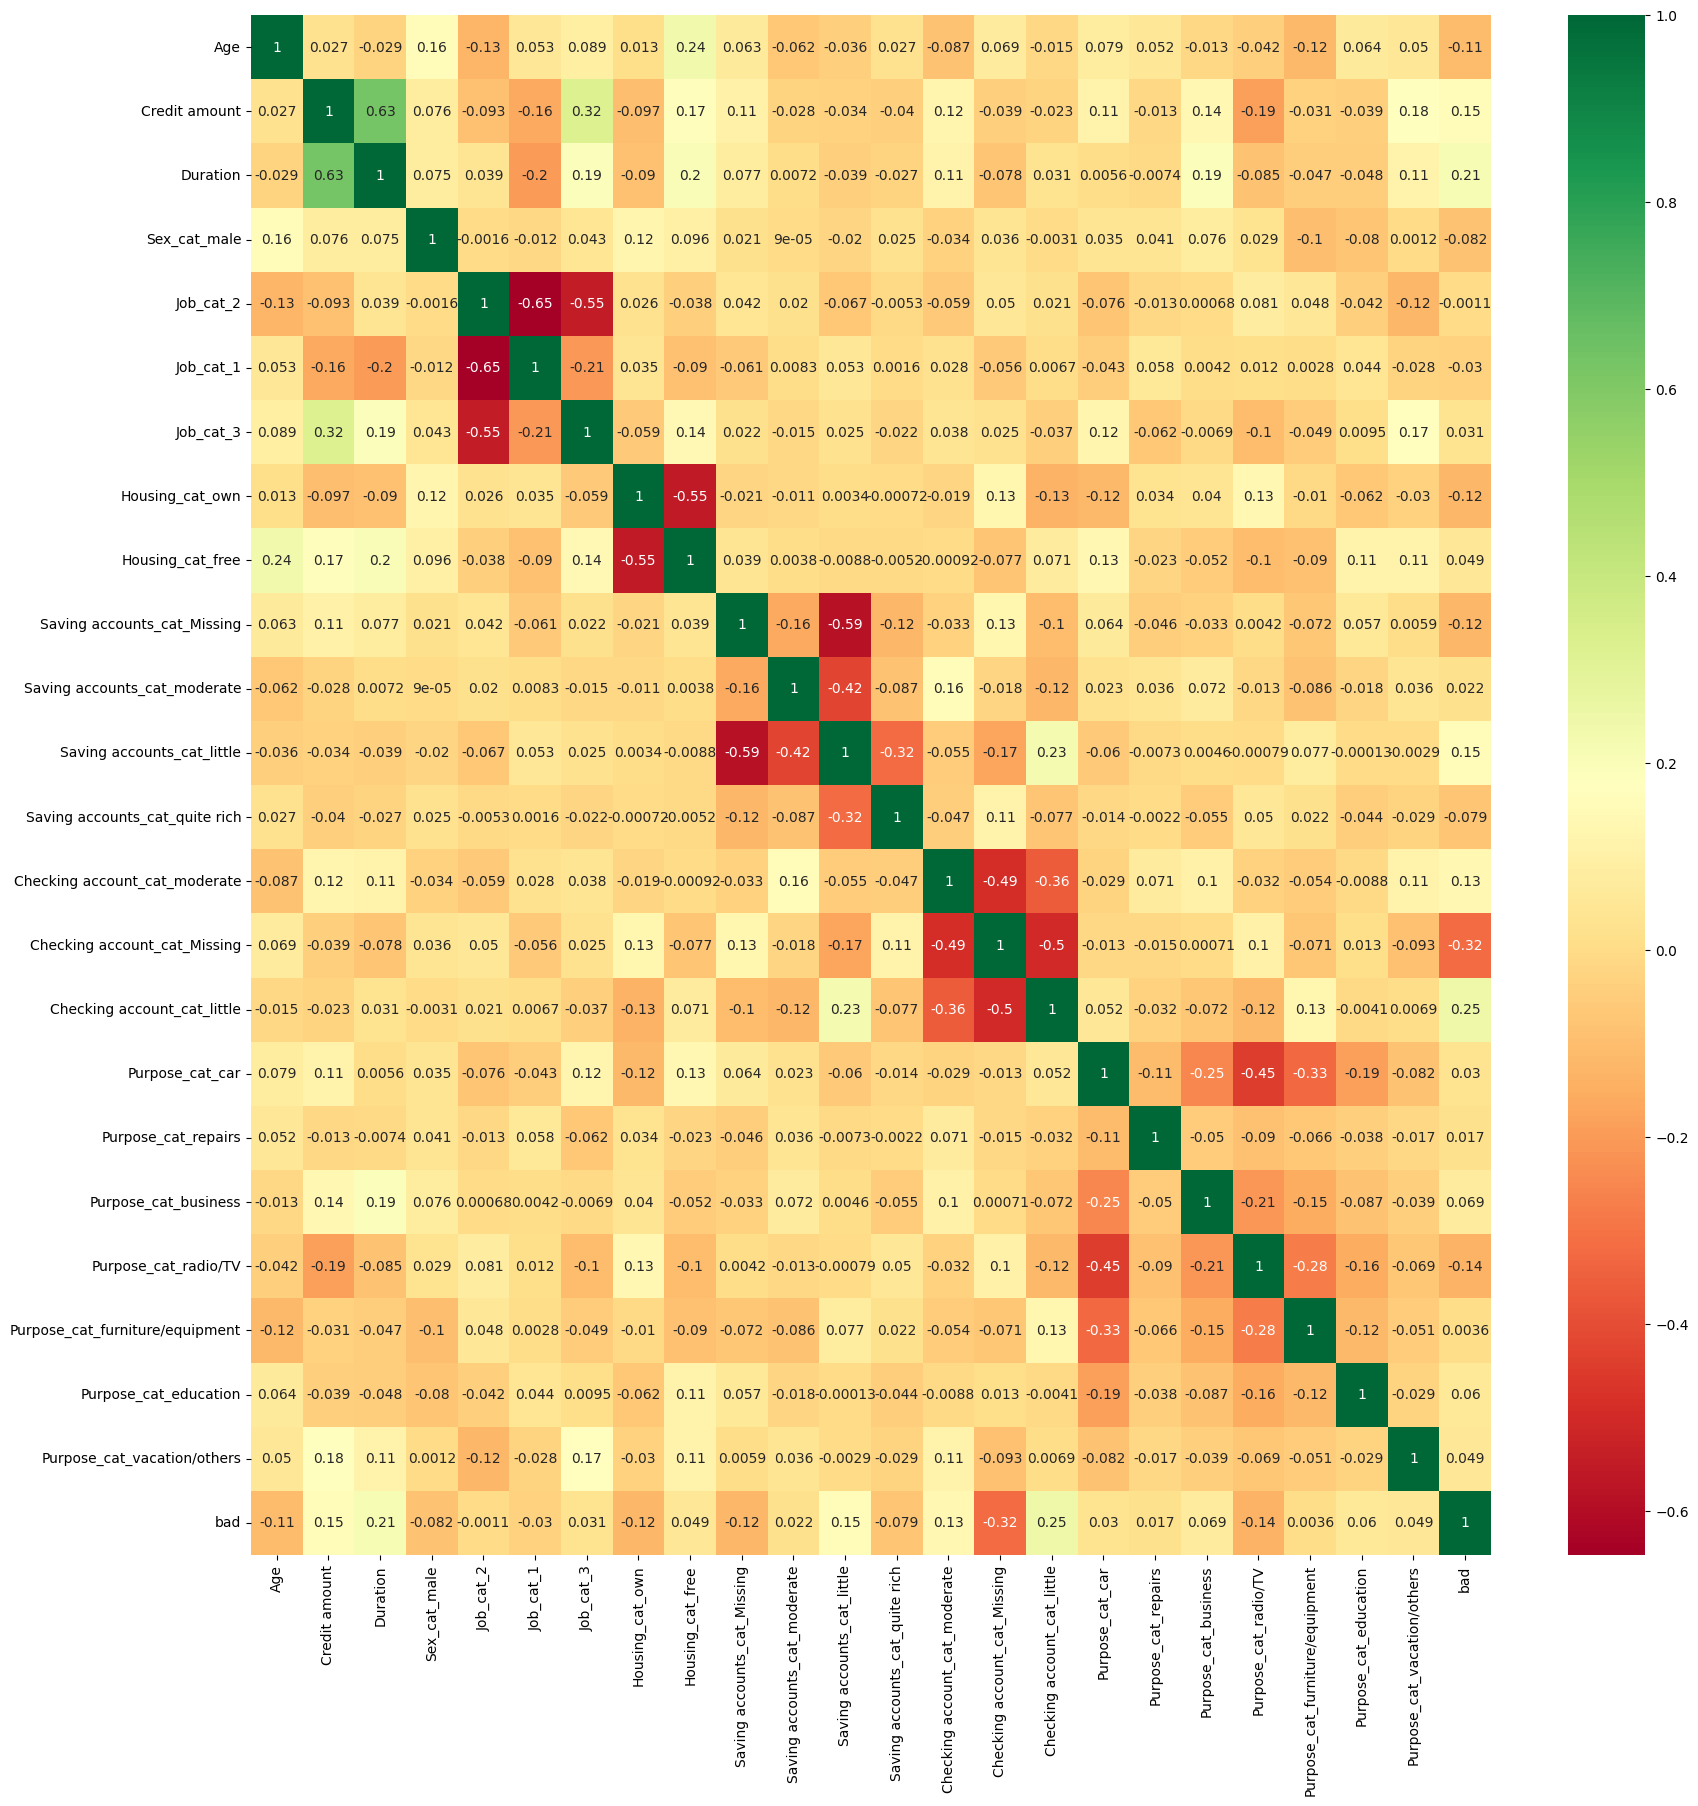

In [25]:
# Correlação !!
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = x_train_t.join(y_train).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_train_t.join(y_train)[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## REGRESSÂO ! 

In [26]:
#Selecionar Variaveis
x_final = x_train_t[['Credit amount',
    'Duration',
    'Checking account_cat_Missing',
    'Age',
    'Checking account_cat_little',
    'Purpose_cat_radio/TV',
    'Checking account_cat_moderate',
    'Saving accounts_cat_Missing',
    'Saving accounts_cat_little',
    'Saving accounts_cat_quite rich',
    ]]
x_test_final =x_test_t[['Credit amount',
    'Duration',
    'Checking account_cat_Missing',
    'Age',
    'Checking account_cat_little',
    'Purpose_cat_radio/TV',
    'Checking account_cat_moderate',
    'Saving accounts_cat_Missing',
    'Saving accounts_cat_little',
    'Saving accounts_cat_quite rich',
    ]]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='newton-cg',penalty ='l2',n_jobs =-1, random_state=0)

In [28]:
model.fit(x_final, y_train)

LogisticRegression(n_jobs=-1, random_state=0, solver='newton-cg')

In [29]:
#Numero de predições corretas
model.score(x_final, y_train)

0.72625

In [30]:
feature_name = x_final.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.014671
1,Credit amount,0.000022
2,Duration,0.034664
3,Checking account_cat_Missing,-0.877446
4,Age,-0.022563
5,Checking account_cat_little,0.833166
6,Purpose_cat_radio/TV,-0.555894
7,Checking account_cat_moderate,0.499037
8,Saving accounts_cat_Missing,-0.457296
9,Saving accounts_cat_little,0.316926


In [31]:
print(classification_report(y_train, model.predict(x_final)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       560
           1       0.57      0.35      0.43       240

    accuracy                           0.73       800
   macro avg       0.67      0.62      0.63       800
weighted avg       0.70      0.73      0.70       800



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = y_test
lr_probs = model.predict_proba(x_test_final)
lr_probs = lr_probs[:, 1]

In [ ]:
y_train_pred = model.predict(x_final)
y_test_pred = model.predict(x_test_final)

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = model.predict_proba(x_test_final)
lr_probs = lr_probs[:, 1]                               
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot